# Lab-9: Convolutions and CNN

In this lab, you will practice convolutional operation and how to implement CNN using keras and tensorflow.


## Objectives:

1. Convolutions - application examples:
    - edge detection    
    - negation
    - blurring
    - sharpening
2. Building CNN in PyTorch / Keras / Tensorflow
    - example CNN
    - comparing with Fully-connected NN

### Recap

1. What is the use of convolutions? (In general)
2. Why use convolutional layers instead of fully-connected ones?

## Convolutions
Let's upload some image (you can try your own image changing the url)

In [26]:
import urllib.request
url = "https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/lss423kothpqpjpwbzg0"
filename = 'grid_img.jpg'
urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x7f92bd21f220>)

32768it [00:51, 639.54it/s]  
1654784it [00:50, 32648.18it/s]  
8192it [00:49, 164.20it/s]              
9920512it [00:52, 188290.66it/s] 


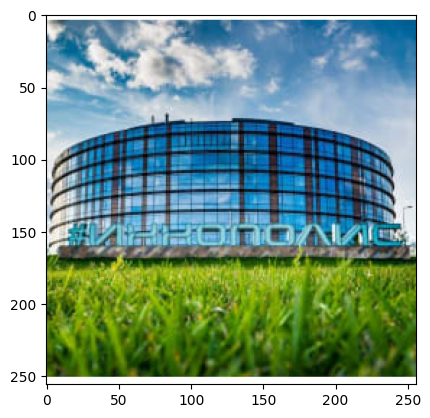

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
import numpy as np

# Let's read and plot the image
image = plt.imread('grid_img.jpg')
plt.imshow(image)

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


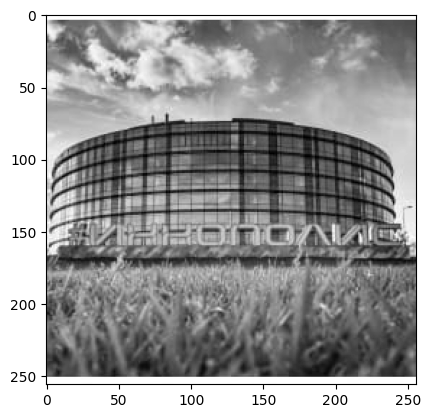

In [28]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


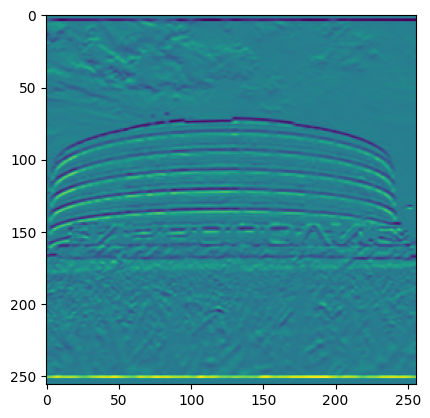

In [29]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1], 
                              [0, 0, 0], 
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')
 
vertical_kernel = np.array([[-1, 0, 1], 
                            [-1, 0, 1], 
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

out_h = ndimage.convolve(gray_image, horizontal_kernel, mode='reflect')
out_v = ndimage.convolve(gray_image, vertical_kernel, mode='reflect')
plt.imshow(out_h)
#plt.imshow(out_v)

Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

Horizontal kernel applied


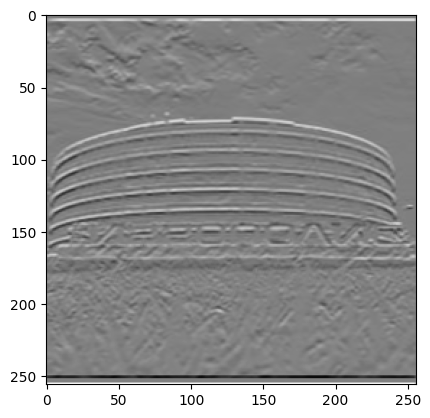

In [30]:
def convolve(img, kernel):
    result = np.zeros(img.shape)
    f = kernel.shape[0]
    padding = (f - 1) // 2
    padding_img = np.lib.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=((0, 0), (0, 0)))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i, j] = np.sum(padding_img[i:i+f, j:j+f] * kernel)
    return result

c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')

Vertical kernel applied


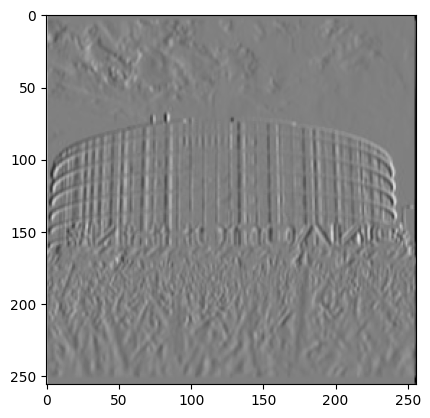

In [31]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Let's see how the kernel affects the output result.
For this, we should set various values on the kernel.

Your kernel applied


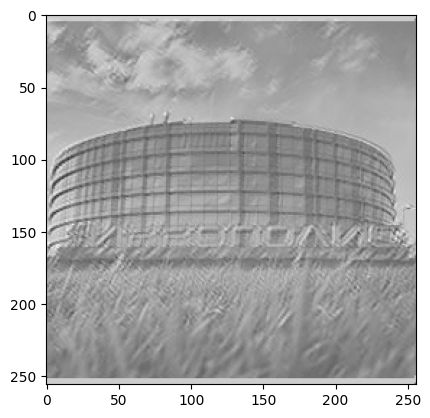

In [32]:
# play with numbers, see how changing the kernel affects the result
your_kernel = np.array([[-1, 1, 1], 
                        [1, -1, 0], 
                        [0, 1, -1]])

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

Negative kernel applied


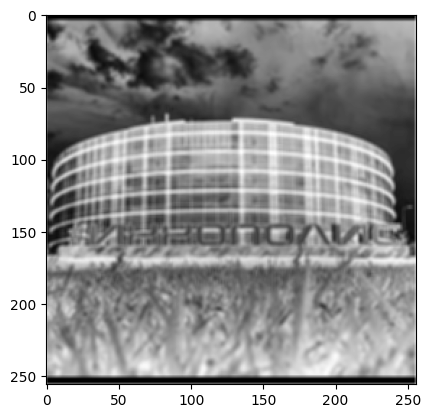

In [33]:
# Define the kernel that will result in reversed image, in which the lightest areas of
# the photographed subject appear darkest and the darkest areas appear the lightest.
negative_kernel = np.array([[-1, -1, -1], 
                            [-1, -1, -1], 
                            [-1, -1, -1]])

c = convolve(gray_image, negative_kernel)
print("Negative kernel applied")
plt.imshow(c, cmap='gray')

Blur kernel applied


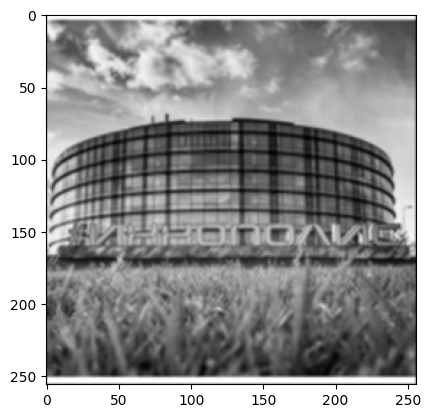

In [34]:
# Define the kernel that will result in a blurred image
# How can we control the degree of blur?

blur_kernel = np.array([[0.5, 0.1, 0.5], 
                        [0.1, 2, 0.1], 
                        [0.5, 0.1, 0.5]])

#simple sum
blur_kernel2 = np.ones((11,11))

c_blurred = convolve(gray_image, blur_kernel)
print("Blur kernel applied")
plt.imshow(c_blurred, cmap='gray')

Sharpen kernel applied


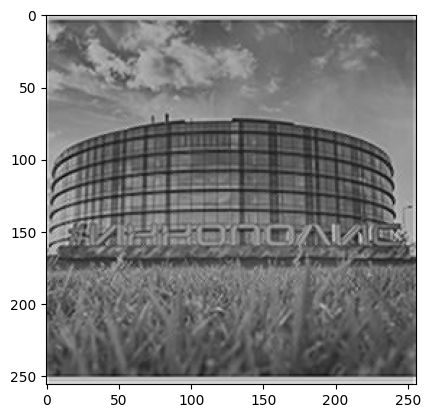

In [35]:
# Now let's sharpen the blurred image back 
sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

c = convolve(c_blurred, sharpen_kernel)
print("Sharpen kernel applied")
plt.imshow(c, cmap='gray')

## Building a CNN using PyTorch

First, let's import the torch library, and we will also try to set the device to GPU if available

In [36]:
import torch

In [37]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [38]:

from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

### Get familiar with dataset

Train dataset info

In [39]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


Test dataset info

In [40]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


Get familiar with the shapes of the dataset

In [41]:
print(f"train dataset shape: {train_data.data.size()}")
print(f"target shape: {train_data.targets.size()}")

train dataset shape: torch.Size([60000, 28, 28])
target shape: torch.Size([60000])


## Visualization of MNIST dataset

Let's plot one single data point

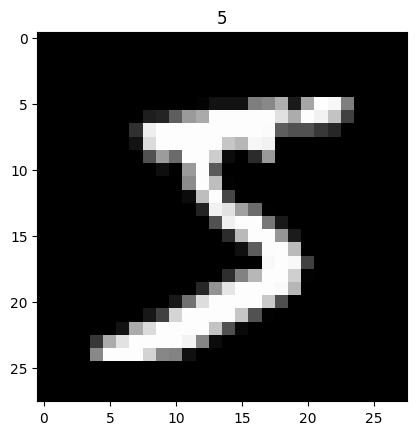

In [42]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

Now, let's plot multiple images

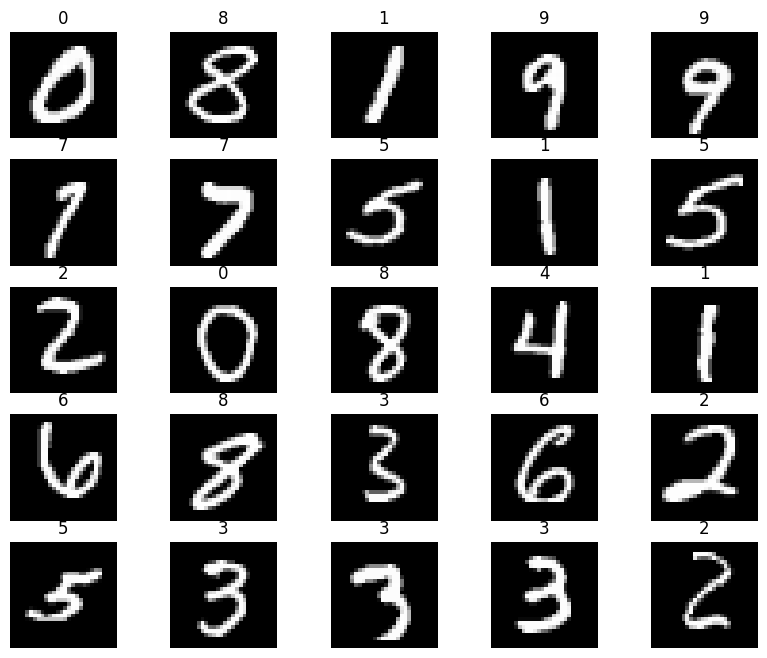

In [43]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Preparing data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [44]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f926675d130>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f926675d1c0>}

#### 1. Regarding Conv2d
- 1.1  What is the main responsibility of the Conv2D layer?

- 1.2 What does filters number mean?
- 1.3 How can we interpret the kernel size? 
- 1.4 What is the purpose of the relu actiation in Conv2D?

#### 2. Regarding MaxPooling
- 2.1 Why do we use MaxPooling2D in CNN?

#### 3. Regarding  Flatten

-  3.1 What is the purpose of the Flatten layer?

## The modules / classes in torch for CNN

Conv2d: Applies a 2D convolution over an input signal composed of several input planes.

Parameters

- in_channels (int) — Number of channels in the input image

- out_channels (int) — Number of channels produced by the convolution

- kernel_size (int or tuple) — Size of the convolving kernel

- stride (int or tuple, optional) — Stride of the convolution. Default: 1

- padding (int or tuple, optional) — Zero-padding added to both sides of the input. Default: 0

- padding_mode (string, optional) — ‘zeros’, ‘reflect’, ‘replicate’ or ‘circular’. Default: ‘zeros’

- dilation (int or tuple, optional) — Spacing between kernel elements. Default: 1

- groups (int, optional) — Number of blocked connections from input channels to output channels. Default: 1

- bias (bool, optional) — If True, adds a learnable bias to the output. Default: True

We will create a CNN using torch Module with the following architecture:

-> Conv2d where in_channels =1, out_channels=16, kernel size 5, stride 1 and padding 2

-> Relu

-> MaxPool2d with kernel size 2

-> Conv2d where in_channels = 16, out_channels=32, kernel size 5, stride 1 and padding 2

-> Relu

-> MaxPool2d with kernel size 2

In [45]:
import torch.nn as nn

class ANN(nn.Module):
    # Network from the last lab
    def __init__(self):
        super(ANN, self).__init__()
        self.hidden1 = nn.Linear(28*28, 256)        
        # Write 2 lines to define 2 more linear layers.
        # 1 hidden layers with number of neurons numbers: 250 and 100
        # 1 output layer that should output 10 neurons, one for each class.
        self.hidden2 = nn.Linear(256, 100) 
        self.output = nn.Linear(100, 10) 


    def forward(self, x):
        # the linear layers fc1, fc2, fc3, and fc4
        # accepts only flattened input (1D batches)
        # while the batch x is of size (batch, 28 * 28)
        # define one line to flatten the x to be of size (batch_sz, 28 * 28)
        x = x.view(-1, 28*28)
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        return F.log_softmax(x, dim=1)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            # add layers here
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization


Commenting on the above mode:

- in_channels=1: because our input is a grayscale image.

- Stride: is the number of pixels to pass at a time when sliding the convolutional kernel.

- Padding: to preserve exactly the size of the input image, it is useful to add a zero padding on the border of the image.

- kernel_size: we need to define a kernel which is a small matrix of size 5 * 5. To perform the convolution operation, we just need to slide the kernel along the image horizontally and vertically and do the dot product of the kernel and the small portion of the image.

- The forward() pass defines the way we compute our output using the given layers and functions.

Now let's create the model based on the architecture specified in the above class and compare the number of parameters in the CNN and ANN models:

In [46]:
cnn = CNN()
ann = ANN()
print(cnn)
print(ann)

print("Number of parameters in the ANN model", sum(p.numel() for p in ann.parameters()))
print("Number of parameters in the CNN model", sum(p.numel() for p in cnn.parameters()))

CNN(
  (conv1): Sequential()
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
ANN(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)
Number of parameters in the ANN model 227670
Number of parameters in the CNN model 15690


### Let's define a loss function

In [47]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

### Optimization Function

Now we will define optimization Function

In [48]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

### It's time to train the model!

Create a function called train() and pass num of epochs, model and data loaders as input parameters.

num_epochs: Number of times our model will go through the entire training dataset

In [49]:
from torch.autograd import Variable
num_epochs = 10


def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y

            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
train(num_epochs, cnn, loaders)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x784 and 1568x10)

### Evaluate the model on test data

We must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.

model.train() tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.

You can call either model.eval() or model.train(mode=False) to tell that you are testing the model.

In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test()

Test Accuracy of the model on the 10000 test images: 0.99


#### ANN vs CNN
> Comparare the performance of the CNN and ANN (from the previous lab) on the same dataset.

## Applying the ANN on the  MNIST dataset

Let's  load the MNIST dataset again (since we made some changes on the previously loaded dataset).

In [ ]:

(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = datasets.mnist.load_data()

X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)


#Encoding the Labels
y_train_digit = keras.utils.to_categorical(y_train_digit, num_classes=10)

y_test_digit = keras.utils.to_categorical(y_test_digit, num_classes=10)

Let's create ANN with the following architecture:

-> Dense ( where input=784 and with 128 units)

-> Dense with 24 units, with activation function relu

-> Dense with 24 units, with activation function relu

-> Dense with 10 units, with activation function sigmoid

In [ ]:
#Creating base neural network
model = keras.Sequential([
    # add layers here
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

Let's train the ANN on the dataset.

In [ ]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=20, validation_split=0.1)

Epoch 1/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2161 - accuracy: 0.9417 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 2/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2148 - accuracy: 0.9434 - val_loss: 0.0599 - val_accuracy: 0.9842
Epoch 3/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2099 - accuracy: 0.9435 - val_loss: 0.0582 - val_accuracy: 0.9853
Epoch 4/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2050 - accuracy: 0.9444 - val_loss: 0.0531 - val_accuracy: 0.9863
Epoch 5/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2027 - accuracy: 0.9445 - val_loss: 0.0561 - val_accuracy: 0.9845
Epoch 6/20
540/540 [==============================] - 2s 3ms/step - loss: 0.2014 - accuracy: 0.9449 - val_loss: 0.0565 - val_accuracy: 0.9843
Epoch 7/20
540/540 [==============================] - 2s 3ms/step - loss: 0.1952 - accuracy: 0.9474 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 

Let's plot the diagram which shows the progress in loss of the model during the train:

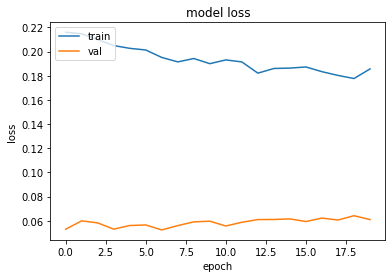

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We can also plot the diagram which shows the progress of the model with regard to its accuracy.

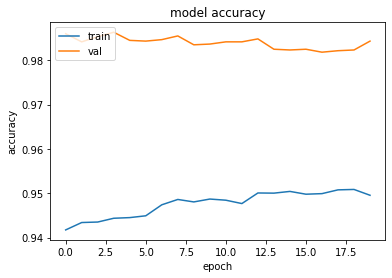

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluate the trained model

In [ ]:
score = model.evaluate(X_test_digit, y_test_digit, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08979776501655579
Test accuracy: 0.9782999753952026


As you can judge from the results, the ANN has around 104K params and we spent 20 epochs on achieving such an accuracy.

Now let's see how CNN could solve such problems easier.

## Building a CNN using Keras in Tensorflow platform

First, we will load the required libraries. The keras library on top of the tensorflow will be utilized.

Keras and TensorFlow are both open-source software. TensorFlow is a software library for machine learning. Keras runs on top of TensorFlow and expands the capabilities of the base machine-learning software. Keras also makes implementation, testing, and usage more user-friendly.

Keras works with TensorFlow to provide an interface in the Python programming language. It works by using layers and models.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
import numpy as np

### Dataset

We will be experimenting the CNN technique on the MNIST (http://yann.lecun.com/exdb/mnist/) dataset which has 60,000 and 10,000 rows for the train and test sets, respectively.

Using keras library, we can load the MNIST dataset directly from the datasets package.

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

Exploring the dataset is an important phase. So we will get familiar with different aspects of the dataset.

In [ ]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


Since most of the libraries and frameworks that work with image expect the input data to be in 4 dimension ($batch\_size \times height \times width \times channel\_for\_colors$) in order to support colored images as well, we should also add another dimension to our dataset to make it 4-dimensional dataset.

In [ ]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape

(60000, 28, 28, 1)

Let's also get familiar with the labels.

In [ ]:
y_train.shape

(60000,)

In [ ]:
import pandas as pd
df_y_train = pd.DataFrame(y_train)
df_y_train.describe()

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [ ]:
df_y_train.head()

,0
0,5
1,0
2,4
3,1
4,9


As you can see, the labels just digits from 0 to 9.

To get visualised information about the dataset, let's plot some of the elements. 
For that, we will create a function which will plot an image with its label (digit).

In [ ]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit: {}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

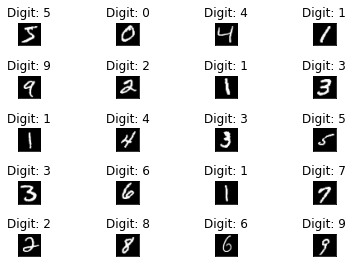

In [ ]:
plot_digits(x_train, y_train)

Since the values of the dataset (x_train and x_test) lie between [0,255], we should normalize it.

In [ ]:
# write two lines of code that will make the pixels lie between [0, 255]

Let's convert the labels into binary class matricies, since we saw earlier that the labels are just in digits format.

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Let's create the sequental model of the keras for adding the layers of the CNN one by one.

The Sequential model should have the following architecture:

-> Input with shape $[128 \times 128 \times 1]$

-> Conv2D (32 filters; kernel size is $[3 \times 3]$; activation function is relu ) 

-> MaxPooling2D layer with pool size $[2 \times 2]$

-> Conv2D (64 filters; kernel size is $[3 \times 3]$; activation function is relu ) 

-> MaxPooling2D layer with pool size $[2 \times 2]$

-> Flatten

-> Dense layer with the softmax activation function (you should also specify the number of output classes)

In [ ]:
# implement the CNN model with the given architecture above
model = keras.Sequential(
    [

    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1600)             

Let's start the training process.  Before that, we should config the model with losses and metrics with model.compile().

In [ ]:
batch_size = 128
epochs = 5
# todo: write one line of code to compile the model with:
#   - the categorical_crossentropy loss function
#   - use adam as optimizer
#   - use 'accuracy' as metrics


# todo: write one line of code to train the model:
#   - set the size of the batch size
#   - also, set train / validation dataset split as 90 / 10


Epoch 1/5
422/422 [==============================] - 17s 39ms/step - loss: 0.3658 - accuracy: 0.8878 - val_loss: 0.0846 - val_accuracy: 0.9758
Epoch 2/5
422/422 [==============================] - 18s 42ms/step - loss: 0.1141 - accuracy: 0.9646 - val_loss: 0.0640 - val_accuracy: 0.9823
Epoch 3/5
422/422 [==============================] - 18s 42ms/step - loss: 0.0863 - accuracy: 0.9734 - val_loss: 0.0491 - val_accuracy: 0.9858
Epoch 4/5
422/422 [==============================] - 17s 41ms/step - loss: 0.0709 - accuracy: 0.9778 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 5/5
422/422 [==============================] - 17s 41ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0391 - val_accuracy: 0.9890


Let's plot the diagram which shows the progress in loss of the model during the train:

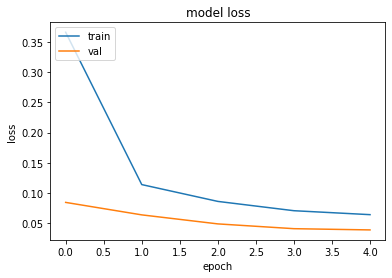

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We can also plot the diagram which shows the progress of the model with regard to its accuracy.

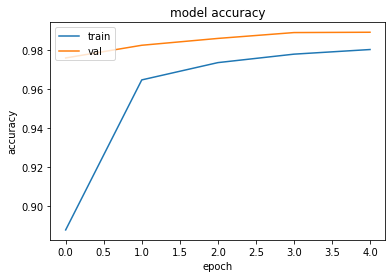

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.036461781710386276
Test accuracy: 0.987500011920929


As you can judge from the results, the CNN (in case of Tensorflow) achieved higher accuracy with less number of parameters (~ 32K) and in less epochs, while the ANN has around 104K params and we spent 20 epochs on achieving less accuracy.

References:

- https://phoenixnap.com/kb/how-to-install-keras-on-linux
- https://www.quora.com/What-is-the-meaning-of-a-filter-size-in-a-CNN
- https://stats.stackexchange.com/questions/363190/why-we-use-activation-function-after-convolution-layer-in-convolution-neural-net
- https://medium.com/analytics-vidhya/applying-ann-digit-and-fashion-mnist-13accfc44660